In [1]:
import numpy as np
import sys
sys.path.append('../')
import heartbeat as hb
import matplotlib.pyplot as plt

In [19]:
co2 = np.genfromtxt('co2_sample.csv')
ppg = np.genfromtxt('ppg_sample.csv')

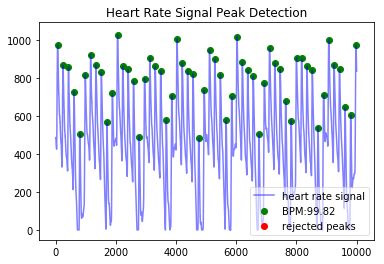

In [85]:
ppg = hb.scale_data(ppg[0:10000])

m = hb.process(ppg, 300.0)

hb.plotter()

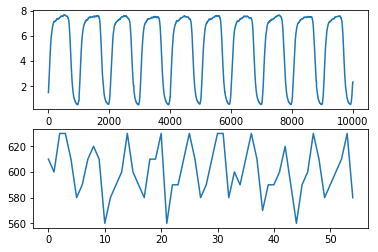

In [25]:
plt.subplot(211)
plt.plot(co2[0:10000])
plt.subplot(212)
plt.plot(hb.working_data['RR_list_cor'])
plt.show()

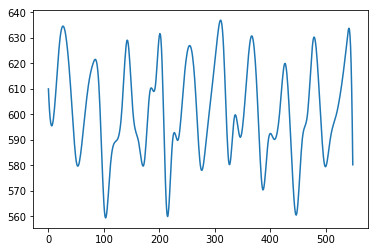

In [110]:
from scipy.interpolate import UnivariateSpline

breathing = hb.working_data['RR_list_cor']

#upsample * 10 and interpolate
x = np.linspace(0, len(breathing), len(breathing))
x_new = np.linspace(0, len(breathing), len(breathing)*10)
interp = UnivariateSpline(x, breathing, k=3)

breathing = interp(x_new)

plt.plot(breathing)
plt.show()

16.5


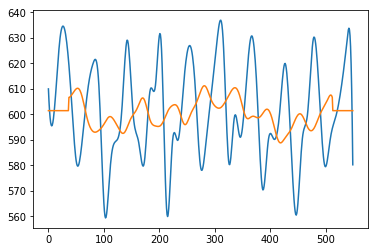

In [111]:
fs = (len(breathing) / len(ppg))* 300.0

print(fs)

rolmean = hb.rolmean(breathing, 0.75, 100)

plt.plot(breathing)
plt.plot(rolmean)
plt.show()

In [112]:
breathing = np.asarray(breathing)

peaksx = np.where((breathing > rolmean))[0]
peaksy = breathing[np.where((breathing > rolmean))[0]]
peakedges = np.concatenate((np.array([0]),
                            (np.where(np.diff(peaksx) > 1)[0]),
                            np.array([len(peaksx)])))
peaklist = []

for i in range(0, len(peakedges)-1):
    try:
        y_values = peaksy[peakedges[i]:peakedges[i+1]].tolist()
        peaklist.append(peaksx[peakedges[i] + y_values.index(max(y_values))])
    except:
        pass
    
if peaklist[0] == 0: del peaklist[0]

In [113]:
peaklist

[26, 84, 142, 201, 255, 311, 367, 427, 479, 542]

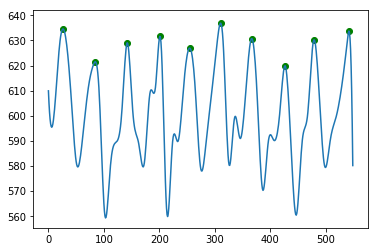

In [114]:
plt.plot(breathing)
plt.scatter(peaklist, [breathing[x] for x in peaklist], color='green')
plt.show()

In [100]:
signaltime = len(ppg) / 300.0
breathingrate = len(peaklist) / signaltime
print('breathingrate: ' + str(breathingrate) + ' Hz')

breathingrate: 0.3 Hz
